In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import json

# static/zoomable/flare.json

In [2]:
panel3_task_year_df = pd.read_csv("../static/data/csv/Panel 3.csv")
panel3_job_skill_2008_df = pd.read_csv("../static/data/csv/Panel 3 Skill Importance 2008.csv")
panel3_job_skill_2020_df = pd.read_csv("../static/data/csv/Panel 3 Skill Importance 2020.csv")

In [3]:
panel3_task_year_df.head()

,Skill Id,Skill Name,Task,2020 Automation Level,2008 Automation Level,Change from 2008 to 2020
0,2.A.2.b,Active Learning,Creative and Critical Thinking,0.410292,0.426175,-0.015883
1,1.A.2.c.2,Wrist-Finger Speed,Machine Control,0.546390,0.548566,-0.002176
2,1.A.1.c.2,Number Facility,Information Processing,0.586415,0.576460,0.009955
3,4.C.1.a.2.h,Electronic Mail,Communication,0.487914,0.521616,-0.033703
4,4.C.2.a.1.e,In an Open Vehicle or Equipment,Vehicle and Equipment Operation,0.490551,0.483999,0.006552


In [4]:
panel3_job_skill_2020_df.head()

,Job Code,Job Title,Active Learning,Wrist-Finger Speed,Number Facility,Electronic Mail,In an Open Vehicle or Equipment,"Guiding, Directing, and Motivating Subordinates",Exposed to High Places,"Inspecting Equipment, Structures, or Material",...,Negotiation,Exposed to Whole Body Vibration,Responsibility for Outcomes and Results,Critical Thinking,Documenting/Recording Information,Pace Determined by Speed of Equipment,Impact of Decisions on Co-workers or Company Results,Sound Localization,Selling or Influencing Others,Finger Dexterity
0,00-0000,Total Average,0.005112,0.006074,0.006224,0.007082,0.004277,0.004526,0.004132,0.005236,...,0.005547,0.003351,0.004557,0.005545,0.005684,0.006107,0.004776,0.005265,0.006075,0.006131
1,11-1011,Chief Executives,0.011143,0.000000,0.008541,0.005866,0.000193,0.017029,0.000000,0.000000,...,0.018686,0.002548,0.011634,0.012309,0.000000,0.000000,0.013549,0.000000,0.011251,0.000000
2,11-1021,General and Operations Managers,0.008178,0.000000,0.004377,0.008209,0.000000,0.020564,0.002806,0.002850,...,0.020039,0.000000,0.020103,0.008804,0.001413,0.000000,0.014679,0.001602,0.016750,0.000000
3,11-2011,Advertising and Promotions Managers,0.005113,0.000000,0.010214,0.014087,0.000000,0.003433,0.000000,0.000000,...,0.015540,0.000000,0.012568,0.017180,0.000000,0.000000,0.006821,0.000000,0.026132,0.000000
4,11-2021,Marketing Managers,0.017440,0.000000,0.012647,0.010547,0.000000,0.017740,0.000000,0.000000,...,0.022615,0.000000,0.013659,0.009936,0.000000,0.000000,0.007857,0.000000,0.029988,0.000000


In [5]:
def standardizer(df, col):
    df[col] -= df[col].min()
    df[col] /= df[col].max()
    
    df[col] = (30**df[col]-1)/30
    
    df[col] = [0.5 if value > 0.5 else value for value in df[col]]
    
    #df[col] = df[col]*200
    #df[col] = df[col]+10
    return df

In [6]:
def standardizer_diff(df, col):
    df[col] -= df[col].min()
    df[col] /= df[col].max()
    
    df[col] = (30**df[col]-1)/30
    
    df[col] = [0.6 if value > 0.6 else value for value in df[col]]
    
    #df[col] = df[col]*200
    #df[col] = df[col]+10
    return df

In [7]:
panel3_task_year_df = standardizer(panel3_task_year_df, "2008 Automation Level")
panel3_task_year_df = standardizer(panel3_task_year_df, "2020 Automation Level")
panel3_task_year_df = standardizer_diff(panel3_task_year_df, "Change from 2008 to 2020")

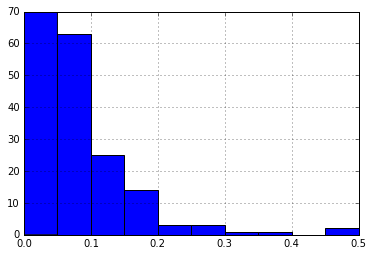

In [8]:
%matplotlib inline
panel3_task_year_df["2008 Automation Level"].hist()

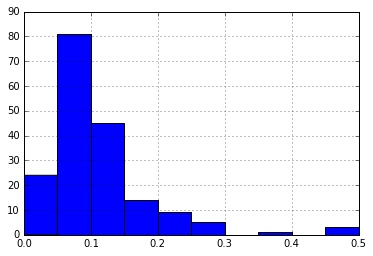

In [9]:
panel3_task_year_df["2020 Automation Level"].hist()

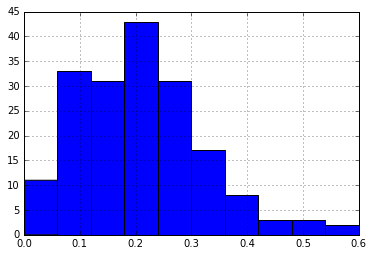

In [10]:
panel3_task_year_df["Change from 2008 to 2020"].hist()

In [11]:
cols = panel3_job_skill_2020_df.columns[3:]

for col in cols:
    panel3_job_skill_2020_df = standardizer(panel3_job_skill_2020_df, col)

In [12]:
cols = panel3_job_skill_2008_df.columns[3:]

for col in cols:
    panel3_job_skill_2008_df = standardizer(panel3_job_skill_2008_df, col)

In [13]:
panel3_task_year_df_gp = panel3_task_year_df.groupby('Task')

#grey 220,220,220
#crimson 220,20,60

In [14]:
color1 = [255,255,255]
color2 = [220,20,60]

In [15]:
for i in range(panel3_job_skill_2020_df.shape[0]):
    #print(panel3_job_skill_2020_df.iloc[i]['Job Code'], panel3_job_skill_2008_df.iloc[i]['Job Code'])
    
    skillmap = {}
    skillmap["name"] = panel3_job_skill_2020_df.iloc[i]['Job Title']
    skillmap["code"] = panel3_job_skill_2020_df.iloc[i]['Job Code']  
    child_collection = []
    
    for nm, gp in panel3_task_year_df_gp:
        child = {}
        child["name"] = nm
        child["children"] = []
        
        for j, r2 in gp.iterrows():
            child["children"].append({"name": r2["Skill Name"],
                                     "importance_2020": panel3_job_skill_2020_df.iloc[i][r2["Skill Name"]],
                                      "importance_2008":panel3_job_skill_2008_df.iloc[i][r2["Skill Name"]], 
                                      "importance_2008_2020": panel3_job_skill_2020_df.iloc[i][r2["Skill Name"]],
                                      
                                      "r_2020":(color2[0]*(r2["2020 Automation Level"]-panel3_task_year_df["2020 Automation Level"].min())+
                                                    color1[0]*(panel3_task_year_df["2020 Automation Level"].max()-r2["2020 Automation Level"]))/
                                                (panel3_task_year_df["2020 Automation Level"].max()-panel3_task_year_df["2020 Automation Level"].min()),
                                      "g_2020":(color2[1]*(r2["2020 Automation Level"]-panel3_task_year_df["2020 Automation Level"].min())+
                                                    color1[1]*(panel3_task_year_df["2020 Automation Level"].max()-r2["2020 Automation Level"]))/
                                                (panel3_task_year_df["2020 Automation Level"].max()-panel3_task_year_df["2020 Automation Level"].min()),
                                      "b_2020":(color2[2]*(r2["2020 Automation Level"]-panel3_task_year_df["2020 Automation Level"].min())+
                                                    color1[2]*(panel3_task_year_df["2020 Automation Level"].max()-r2["2020 Automation Level"]))/
                                                (panel3_task_year_df["2020 Automation Level"].max()-panel3_task_year_df["2020 Automation Level"].min()),                                      
                                      "r_2008":(color2[0]*(r2["2008 Automation Level"]-panel3_task_year_df["2008 Automation Level"].min())+
                                                    color1[0]*(panel3_task_year_df["2008 Automation Level"].max()-r2["2008 Automation Level"]))/
                                                (panel3_task_year_df["2008 Automation Level"].max()-panel3_task_year_df["2008 Automation Level"].min()),
                                      "g_2008":(color2[1]*(r2["2008 Automation Level"]-panel3_task_year_df["2008 Automation Level"].min())+
                                                    color1[1]*(panel3_task_year_df["2008 Automation Level"].max()-r2["2008 Automation Level"]))/
                                                (panel3_task_year_df["2008 Automation Level"].max()-panel3_task_year_df["2008 Automation Level"].min()),
                                      "b_2008":(color2[2]*(r2["2008 Automation Level"]-panel3_task_year_df["2008 Automation Level"].min())+
                                                    color1[2]*(panel3_task_year_df["2008 Automation Level"].max()-r2["2008 Automation Level"]))/
                                                (panel3_task_year_df["2008 Automation Level"].max()-panel3_task_year_df["2008 Automation Level"].min()),
                                      "r_2008_2020":(color2[0]*(r2["Change from 2008 to 2020"]-panel3_task_year_df["Change from 2008 to 2020"].min())+
                                                    color1[0]*(panel3_task_year_df["Change from 2008 to 2020"].max()-r2["Change from 2008 to 2020"]))/
                                                (panel3_task_year_df["Change from 2008 to 2020"].max()-panel3_task_year_df["Change from 2008 to 2020"].min()),
                                      "g_2008_2020":(color2[1]*(r2["Change from 2008 to 2020"]-panel3_task_year_df["Change from 2008 to 2020"].min())+
                                                    color1[1]*(panel3_task_year_df["Change from 2008 to 2020"].max()-r2["Change from 2008 to 2020"]))/
                                                (panel3_task_year_df["Change from 2008 to 2020"].max()-panel3_task_year_df["Change from 2008 to 2020"].min()),
                                      "b_2008_2020":(color2[2]*(r2["Change from 2008 to 2020"]-panel3_task_year_df["Change from 2008 to 2020"].min())+
                                                    color1[2]*(panel3_task_year_df["Change from 2008 to 2020"].max()-r2["Change from 2008 to 2020"]))/
                                                (panel3_task_year_df["Change from 2008 to 2020"].max()-panel3_task_year_df["Change from 2008 to 2020"].min()),
                                     })
            
        child_collection.append(child)  
        
    skillmap["children"] = child_collection
        
    #with open('../static/data/network/'+r1['Job Code']+'-2020'+'.json', 'w') as outfile:
    with open('../static/data/network/'+panel3_job_skill_2020_df.iloc[i]['Job Code']+'.json', 'w') as outfile:    
        json.dump(skillmap, outfile)

In [ ]:
"""
for i, r1 in zip(panel3_job_skill_2020_df.iterrows(), panel3_job_skill_2008_df.iterrows):
    skillmap = {}
    skillmap["name"] = r1['Job Title']
    skillmap["code"] = r1['Job Code']
    child_collection = []
    
    for nm, gp in panel3_task_year_df_gp:
        child = {}
        child["name"] = nm
        child["children"] = []
        
        for i, r2 in gp.iterrows():
            child["children"].append({"name": r2["Skill Name"],
                                     "importance": r1[r2["Skill Name"]],
                                      "r_2020":220,
                                      "g_2020":(20*(r2["2020 Automation Level"]-panel3_task_year_df["2020 Automation Level"].min())+
                                                    220*(panel3_task_year_df["2020 Automation Level"].max()-r2["2020 Automation Level"]))/
                                                (panel3_task_year_df["2020 Automation Level"].max()-panel3_task_year_df["2020 Automation Level"].min()),
                                      "b_2020":(60*(r2["2020 Automation Level"]-panel3_task_year_df["2020 Automation Level"].min())+
                                                    220*(panel3_task_year_df["2020 Automation Level"].max()-r2["2020 Automation Level"]))/
                                                (panel3_task_year_df["2020 Automation Level"].max()-panel3_task_year_df["2020 Automation Level"].min()),                                      
                                      "r_2008":220,
                                      "g_2008":(20*(r2["2008 Automation Level"]-panel3_task_year_df["2008 Automation Level"].min())+
                                                    220*(panel3_task_year_df["2008 Automation Level"].max()-r2["2008 Automation Level"]))/
                                                (panel3_task_year_df["2008 Automation Level"].max()-panel3_task_year_df["2008 Automation Level"].min()),
                                      "b_2008":(60*(r2["2008 Automation Level"]-panel3_task_year_df["2008 Automation Level"].min())+
                                                    220*(panel3_task_year_df["2008 Automation Level"].max()-r2["2008 Automation Level"]))/
                                                (panel3_task_year_df["2008 Automation Level"].max()-panel3_task_year_df["2008 Automation Level"].min()),
                                      "r_2008_2020":220,
                                      "g_2008_2020":(20*(r2["Change from 2008 to 2020"]-panel3_task_year_df["Change from 2008 to 2020"].min())+
                                                    220*(panel3_task_year_df["Change from 2008 to 2020"].max()-r2["Change from 2008 to 2020"]))/
                                                (panel3_task_year_df["Change from 2008 to 2020"].max()-panel3_task_year_df["Change from 2008 to 2020"].min()),
                                      "b_2008_2020":(60*(r2["Change from 2008 to 2020"]-panel3_task_year_df["Change from 2008 to 2020"].min())+
                                                    220*(panel3_task_year_df["Change from 2008 to 2020"].max()-r2["Change from 2008 to 2020"]))/
                                                (panel3_task_year_df["Change from 2008 to 2020"].max()-panel3_task_year_df["Change from 2008 to 2020"].min()),
                                     "skill_id": r2["Skill Id"], "task": r2["Task"], "desc":r2["Description"]})
            
        child_collection.append(child)  
        
    skillmap["children"] = child_collection
        
    #with open('../static/data/network/'+r1['Job Code']+'-2020'+'.json', 'w') as outfile:
    with open('../static/data/network/'+r1['Job Code']+'.json', 'w') as outfile:    
        json.dump(skillmap, outfile)
"""        

In [ ]:
"""
for i, r1 in panel3_job_skill_df.iterrows():
    skillmap = {}
    skillmap["name"] = r1['Job Title']
    skillmap["code"] = r1['Job Code']
    child_collection = []
    
    for nm, gp in panel3_task_year_df_gp:
        child = {}
        child["name"] = nm
        child["children"] = []
        
        for i, r2 in gp.iterrows():
            child["children"].append({"name": r2["Skill Name"], "importance": r1[r2["Skill Name"]],
                                     "automation_2020": r2["2020 Automation Level"],
                                      "r_2020":220,
                                      "g_2020":(20*(r2["2020 Automation Level"]-panel3_task_year_df["2020 Automation Level"].min())+
                                                    220*(panel3_task_year_df["2020 Automation Level"].max()-r2["2020 Automation Level"]))/
                                                (panel3_task_year_df["2020 Automation Level"].max()-panel3_task_year_df["2020 Automation Level"].min()),
                                                
                                      "b_2020":(60*(r2["2020 Automation Level"]-panel3_task_year_df["2020 Automation Level"].min())+
                                                    220*(panel3_task_year_df["2020 Automation Level"].max()-r2["2020 Automation Level"]))/
                                                (panel3_task_year_df["2020 Automation Level"].max()-panel3_task_year_df["2020 Automation Level"].min()),                                      
                                     "automation_2008": r2["Change from 2008 to 2020"],   
                                      "r_2008":220,
                                      "g_2008":(20*(r2["2008 Automation Level"]-panel3_task_year_df["2008 Automation Level"].min())+
                                                    220*(panel3_task_year_df["2008 Automation Level"].max()-r2["2008 Automation Level"]))/
                                                (panel3_task_year_df["2008 Automation Level"].max()-panel3_task_year_df["2008 Automation Level"].min()),
                                      "b_2008":(60*(r2["2008 Automation Level"]-panel3_task_year_df["2008 Automation Level"].min())+
                                                    220*(panel3_task_year_df["2008 Automation Level"].max()-r2["2008 Automation Level"]))/
                                                (panel3_task_year_df["2008 Automation Level"].max()-panel3_task_year_df["2008 Automation Level"].min()),
                                     "automation_2008~2020": r2["Change from 2008 to 2020"],   
                                      "r_2008_2020":220,
                                      "g_2008_2020":(20*(r2["Change from 2008 to 2020"]-panel3_task_year_df["Change from 2008 to 2020"].min())+
                                                    220*(panel3_task_year_df["Change from 2008 to 2020"].max()-r2["Change from 2008 to 2020"]))/
                                                (panel3_task_year_df["Change from 2008 to 2020"].max()-panel3_task_year_df["Change from 2008 to 2020"].min()),
                                      "b_2008_2020":(60*(r2["Change from 2008 to 2020"]-panel3_task_year_df["Change from 2008 to 2020"].min())+
                                                    220*(panel3_task_year_df["Change from 2008 to 2020"].max()-r2["Change from 2008 to 2020"]))/
                                                (panel3_task_year_df["Change from 2008 to 2020"].max()-panel3_task_year_df["Change from 2008 to 2020"].min()),
                                     "skill_id": r2["Skill Id"], "task": r2["Task"], "desc":r2["Description"]})
            
        child_collection.append(child)  
        
    skillmap["children"] = child_collection
        
    #with open('../static/data/network/'+r1['Job Code']+'-2020'+'.json', 'w') as outfile:
    with open('../static/data/network/'+r1['Job Code']+'.json', 'w') as outfile:    
        json.dump(skillmap, outfile)
"""